libraries

In [3]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

setting up data frame

In [4]:
df = sb.events(match_id=8657)

match_ids =[3857256, 3869151, 3857257, 3857258, 3857288, 3857267, 3869321, 3857287, 3869486,
 3869685, 3857260, 3857264, 3857266, 3857289, 3857269, 3857294, 3869254, 3869118,
 3869684, 3869519, 3869354, 3869552, 3869420, 3869220, 3869219, 3869253, 3869152,
 3869117, 3857270, 3857263, 3857259, 3857295, 3857283, 3857284, 3857282, 3857286,
 3857301, 3857300, 3857299, 3857298, 3857297, 3857296, 3857293, 3857292, 3857291,
 3857290, 3857285, 3857281, 3857280, 3857279, 3857278, 3857277, 3857276, 3857275,
 3857274, 3857273, 3857272, 3857271, 3857268, 3857265, 3857262, 3857261, 3857255,
 3857254]

for i in match_ids:
    df_extra = sb.events(match_id=i)
    df = pd.concat([df,df_extra],ignore_index=True)

df = df[['team','minute','location','shot_body_part',
       'shot_end_location', 'shot_first_time', 
      'shot_one_on_one', 'shot_outcome',
       'shot_statsbomb_xg', 'shot_technique', 'shot_type']]
df_shot = df[['shot_outcome']]

df.dropna(inplace=True,subset=['shot_outcome'])

df = df[['location','shot_end_location','shot_body_part','shot_technique','shot_type']]
df.sample(10)


c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-pa

,location,shot_end_location,shot_body_part,shot_technique,shot_type
155804,"[112.7, 32.9]","[117.5, 36.9, 1.7]",Right Foot,Normal,Open Play
217503,"[103.5, 32.3]","[105.5, 33.3]",Right Foot,Normal,Open Play
89501,"[101.4, 53.7]","[102.5, 52.8]",Right Foot,Normal,Open Play
117208,"[102.8, 46.4]","[104.0, 45.8]",Left Foot,Normal,Open Play
167154,"[101.1, 39.1]","[103.5, 39.1]",Right Foot,Half Volley,Open Play
41011,"[103.7, 45.1]","[109.7, 44.1, 0.5]",Right Foot,Half Volley,Open Play
106539,"[106.9, 63.2]","[118.9, 42.5, 1.3]",Left Foot,Normal,Free Kick
185203,"[114.1, 35.3]","[120.0, 38.4, 4.5]",Right Foot,Half Volley,Open Play
29757,"[97.2, 49.3]","[120.0, 36.0, 0.4]",Right Foot,Normal,Open Play
36681,"[101.8, 53.7]","[113.4, 46.4, 0.5]",Right Foot,Normal,Open Play


splitting cooirdinets of start location shot

In [5]:
# Find the maximum number of values in 'end_locations'
max_length = max(df['location'].apply(len))

# Create column names based on the maximum length of arrays
new_columns = [f'location{i+1}' for i in range(max_length)]

# Splitting arrays into separate columns based on the number of values (2 or 3)
end_location_values = df['location'].apply(lambda x: x + [None] * (max_length - len(x)))

# Create new DataFrame with the split values
df[new_columns] = pd.DataFrame(end_location_values.tolist(), columns=new_columns, index=df.index)

# Drop the original 'shot_end_location' column
df.drop('location', axis=1, inplace=True)

splitting location in an x,y cooirdinets

In [6]:
# Find the maximum number of values in 'end_locations'
max_length = max(df['shot_end_location'].apply(len))

# Create column names based on the maximum length of arrays
new_columns = [f'shot_end_location_{i+1}' for i in range(max_length)]

# Splitting arrays into separate columns based on the number of values (2 or 3)
end_location_values = df['shot_end_location'].apply(lambda x: x + [None] * (max_length - len(x)))

# Create new DataFrame with the split values
df[new_columns] = pd.DataFrame(end_location_values.tolist(), columns=new_columns, index=df.index)

# Drop the original 'shot_end_location' column
df.drop('shot_end_location', axis=1, inplace=True)

outlier removal

In [7]:
# outliers removal

# Define the column and the limit
column_name = 'shot_end_location_2'  # Column to check
limit_value = 60    # Maximum limit

# Remove rows where the value in 'column_name' exceeds the 'limit_value'
df = df[df[column_name] <= limit_value]
# outliers removal

# Define the column and the limit
column_name = 'shot_end_location_2'  # Column to check
limit_value = 20    # minimum limit

# Remove rows where the value in 'column_name' exceeds the 'limit_value'
df = df[df[column_name] >= limit_value]
# Display the resulting DataFrame after removing rows

# Define the column and the limit
column_name = 'location1'  # Column to check
limit_value = 120    # Maximum limit

# Remove rows where the value in 'column_name' exceeds the 'limit_value'
df = df[df[column_name] <= limit_value]
# outliers removal

# Define the column and the limit
column_name = 'location1'  # Column to check
limit_value = 100    # minimum limit

# Remove rows where the value in 'column_name' exceeds the 'limit_value'
df = df[df[column_name] >= limit_value]
# Display the resulting DataFrame after removing rows

df.sample(10)

,shot_body_part,shot_technique,shot_type,location1,location2,shot_end_location_1,shot_end_location_2,shot_end_location_3
66748,Right Foot,Normal,Open Play,108.4,23.1,108.9,23.7,NaN
127953,Right Foot,Normal,Open Play,110.3,46.8,120.0,42.8,2.4
131629,Right Foot,Normal,Open Play,108.3,57.9,120.0,44.2,3.0
98779,Head,Normal,Open Play,109.5,45.1,120.0,45.1,2.0
73822,Head,Normal,Open Play,110.9,36.5,111.7,36.6,NaN
22306,Left Foot,Half Volley,Open Play,106.4,54.9,109.0,51.9,NaN
175233,Head,Normal,Open Play,113.3,38.7,120.0,33.9,0.4
84394,Right Foot,Half Volley,Open Play,108.6,44.6,110.7,44.0,NaN
66739,Head,Normal,Open Play,110.8,35.6,114.3,33.6,NaN
148792,Left Foot,Normal,Open Play,108.4,48.6,120.0,39.8,0.4


converting string data to numbers

In [8]:
#body part head=0, left foot =1, rightfoot=2 left foot 
df['shot_body_part'] = df['shot_body_part'].astype('category') 
df['newshot_body_part'] = df['shot_body_part'].cat.codes


#NAN 'Volley'=6 'Normal'=4 'Half Volley'=2 'Lob'=?'Backheel'=? 'Diving Header'=? 'Overhead Kick'=5
df['shot_technique'] = df['shot_technique'].astype('category') 
df['new_shot_technique'] = df['shot_technique'].cat.codes

#'Open Play' =2 'Corner'=0 'Free Kick'=1 'Penalty'=3
df['shot_type'] = df['shot_type'].astype('category') 
df['new_shot_type'] = df['shot_type'].cat.codes

plot of shot taken and where it ended

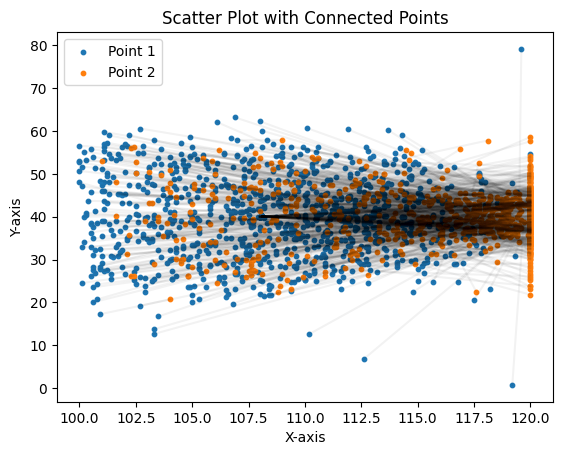

In [9]:
# Extracting x and y coordinates for points 1 and 2
x1 = df['location1']  # Replace 'Column1' with the actual name of the x-coordinate column for point 1
y1 = df['location2']  # Replace 'Column2' with the actual name of the y-coordinate column for point 1
x2 = df['shot_end_location_1']  # Replace 'Column3' with the actual name of the x-coordinate column for point 2
y2 = df['shot_end_location_2']  # Replace 'Column4' with the actual name of the y-coordinate column for point 2

# Create a scatter plot with points for both sets of coordinates
plt.scatter(x1, y1, label='Point 1',s= 10)
plt.scatter(x2, y2, label='Point 2',s = 10)

# Connect corresponding points with lines
for i in range(len(df)):
    plt.plot([x1.iloc[i], x2.iloc[i]], [y1.iloc[i], y2.iloc[i]], 'k-', alpha=0.05)  # Connecting points with a line

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Connected Points')

# Display a legend
plt.legend()

# Show the plot
plt.show()

seting up the ai

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming events_X contains features and events_y contains target values
events_X = df[['location1','location2','newshot_body_part','new_shot_technique','new_shot_type']]
events_y = df[['shot_end_location_2']]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(events_X, events_y, test_size=0.2, random_state=42)

# Creating an Elastic Net model
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net.fit(X_train, y_train)

# Making predictions on the test set
y_pred = elastic_net.predict(X_test)

c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

plotting of predicted vs actual value and mean squered error

Mean Squared Error: 27.41


c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\sjoos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


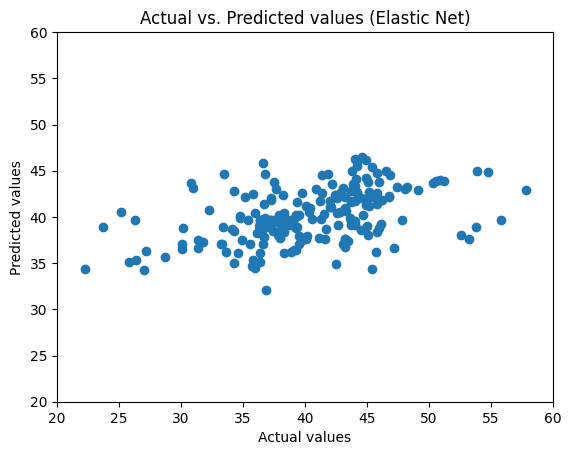

In [11]:
# Calculating and printing the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualizing the predicted vs. actual values for one specific dimension (assuming 2D data)
plt.scatter(y_test, y_pred)  # Plotting one dimension (you may adjust indices)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values (Elastic Net)')
# Set x and y limits
plt.xlim(20, 60) 
plt.ylim(20, 60)  
plt.show()